In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy import stats

In [2]:
# Definitions

# Directorio de imagenes
dir_img = './../imagenes/P2_3'

# Data files
data_file = './../data/P3_2_3.txt'

In [3]:
# Creamos el directorio de imagenes
if not os.path.exists(dir_img):
	os.mkdir(dir_img)
else :
	os.system("rm -r " + dir_img)
	os.mkdir(dir_img)

In [4]:
# Get lines from data files
file = open(data_file, 'r')

# Read data in blocks of 5 lines
blocks = []

for i, line in enumerate(file):
	if i % 5 == 0:
		blocks.append([])
	blocks[-1].append(line)

# Close file
file.close()


In [5]:
# Review blocks to get the desired data
row_data = []

for block in blocks:

	splited_1 = block[0].split()
	splited_2 = block[1].split()
	splited_3 = block[2].split()
	splited_4 = block[3].split()
	splited_5 = block[4].split()

	elements = splited_1[4]
	blocks = splited_1[9]
	threads = splited_1[-2]
	repts = splited_2[4]
	time_host = splited_2[-2]
	time_dev = splited_3[-2]

	row_data.append({
		'elements': elements,
		'blocks': blocks,
		'threads': threads,
		'repts': repts,
		'time_host': time_host,	# MS
		'time_dev': time_dev	# MS
	})


In [6]:
# Convert row data to pandas DataFrame
df = pd.DataFrame(row_data)

# Convert columns to numeric
df['elements'] = pd.to_numeric(df['elements'])
df['blocks'] = pd.to_numeric(df['blocks'])
df['threads'] = pd.to_numeric(df['threads'])
df['repts'] = pd.to_numeric(df['repts'])
df['time_host'] = pd.to_numeric(df['time_host'])
df['time_dev'] = pd.to_numeric(df['time_dev'])

# Limit times to 2 decimal places
df['time_host'] = df['time_host'].round(3)
df['time_dev'] = df['time_dev'].round(3)

display(df)

# Latex code
# code = df.to_latex(index=False)
# print(code)

,elements,blocks,threads,repts,time_host,time_dev
0,3480000000,6397059,544,1,15929.340,16674.916
1,3480000000,6397059,544,2,26827.312,9962.560
2,3480000000,6397059,544,3,37525.497,9680.245
3,3480000000,6397059,544,4,51515.259,10008.560
4,3480000000,6397059,544,5,63471.979,10108.948
5,3480000000,6397059,544,6,74938.242,10114.232
6,3480000000,6397059,544,7,87200.833,9813.671
7,3480000000,6397059,544,8,99132.063,9964.844
8,3480000000,6397059,544,9,110922.887,10359.982
9,3480000000,6397059,544,10,122735.950,9955.548


In [7]:
# Remove atipical values using z-score

z_scores = np.abs(stats.zscore(df['time_host']))
threshold = 2

df = df[(z_scores < threshold)]

z_scores = np.abs(stats.zscore(df['time_dev']))
threshold = 2

df = df[(z_scores < threshold)]

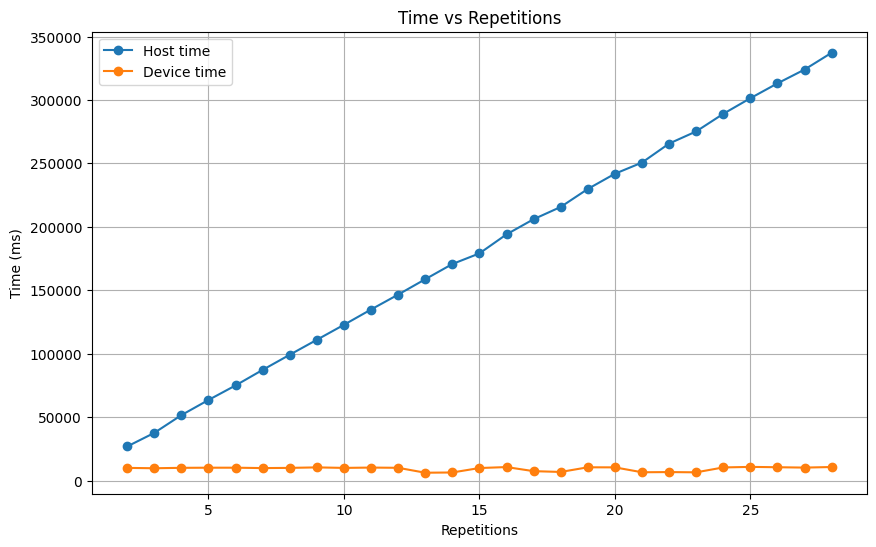

In [8]:
# Plot time vs repts

plt.figure(figsize=(10, 6))

x_values = df['repts']
y_values_1 = df['time_host']
y_values_2 = df['time_dev']

plt.plot(x_values, y_values_1, label='Host time', marker='o')
plt.plot(x_values, y_values_2, label='Device time', marker='o')

plt.title('Time vs Repetitions')

plt.xlabel('Repetitions')
plt.ylabel('Time (ms)')

plt.grid()

plt.legend()

plt.savefig(dir_img + '/time_vs_repts.png')

plt.show()

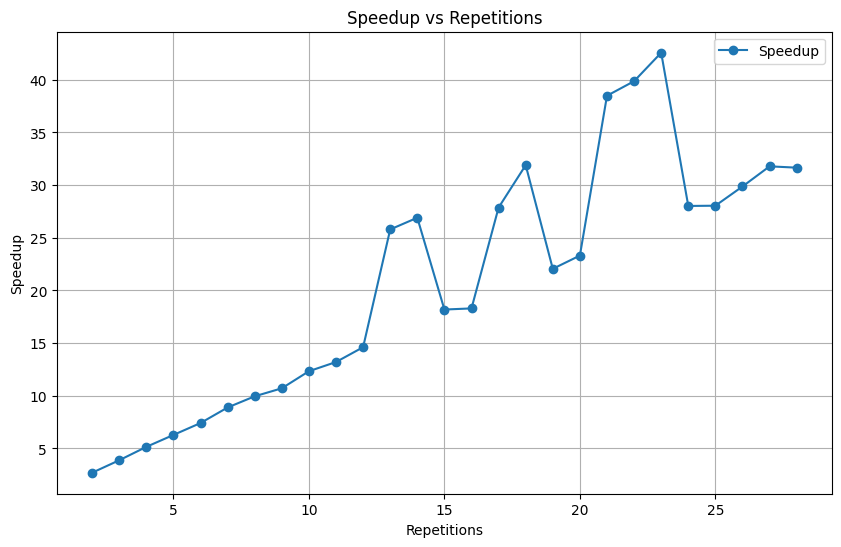

In [9]:
# Speedup plot

plt.figure(figsize=(10, 6))

x_values = df['repts']
y_values = df['time_host'] / df['time_dev']

plt.plot(x_values, y_values, label='Speedup', marker='o')

plt.title('Speedup vs Repetitions')

plt.xlabel('Repetitions')
plt.ylabel('Speedup')

plt.grid()

plt.legend()

plt.savefig(dir_img + '/speedup_vs_repts.png')

plt.show()
